# AI-Generated Text Detection - Baseline Model

In [1]:

# Run preprocessing script to prepare processed_hc3.csv
!python3 ../scripts/data_preprocessing.py


Processed dataset saved to ../data/processed_hc3.csv with 85431 valid samples.


## Train Baseline Model

In [2]:

# Train TF-IDF + Logistic Regression model
!python3 ../scripts/train_baseline.py


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11737
           1       0.95      0.92      0.93      5350

    accuracy                           0.96     17087
   macro avg       0.95      0.95      0.95     17087
weighted avg       0.96      0.96      0.96     17087

Confusion Matrix:
 [[11454   283]
 [  437  4913]]
Model saved to ../models/baseline_model.pkl and vectorizer saved to ../models/tfidf_vectorizer.pkl.


## Load and Display Evaluation Metrics

In [3]:

import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Load model and vectorizer
model = joblib.load('../models/baseline_model.pkl')
vectorizer = joblib.load('../models/tfidf_vectorizer.pkl')

# Load test dataset
df = pd.read_csv('../data/processed_hc3.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Transform test data and evaluate
X_test_tfidf = vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11737
           1       0.95      0.92      0.93      5350

    accuracy                           0.96     17087
   macro avg       0.95      0.95      0.95     17087
weighted avg       0.96      0.96      0.96     17087



array([[11454,   283],
       [  437,  4913]])

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11737
           1       0.95      0.92      0.93      5350

    accuracy                           0.96     17087
   macro avg       0.95      0.95      0.95     17087
weighted avg       0.96      0.96      0.96     17087



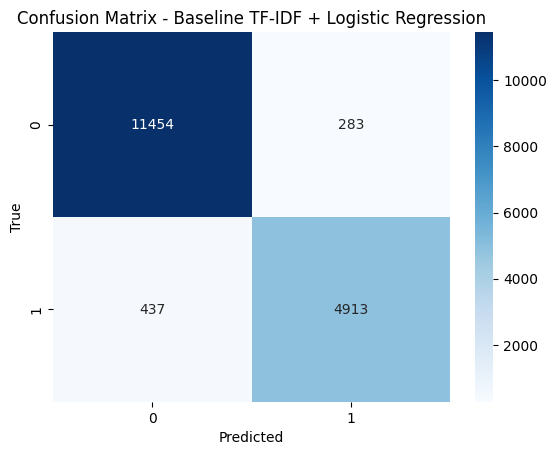

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Transform X_test using the loaded vectorizer
X_test_tfidf = vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline TF-IDF + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

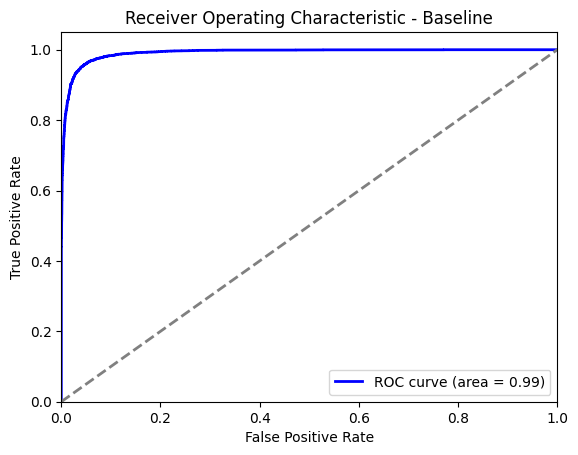

In [7]:
# Compute predicted probabilities for the positive class using the loaded model and vectorizer
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Baseline')
plt.legend(loc="lower right")
plt.show()

In [9]:
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]
top_features = sorted(zip(coefs, feature_names), reverse=True)[:20]

print("Top 20 indicative words for AI class:")
for coef, feat in top_features:
    print(f"{feat}: {coef:.4f}")

Top 20 indicative words for AI class:
important: 11.8946
including: 8.9493
help: 8.8626
helps: 8.2097
and: 8.2068
might: 7.5494
may: 7.4264
can: 7.3218
overall: 7.2985
questions: 7.2399
doesn: 6.6514
don: 6.6021
located: 6.4907
or: 6.3570
nthe: 5.8271
however: 5.7759
able: 5.5957
when: 5.2070
sure: 5.0812
generating: 5.0377
